### Ph 322 Computational Physics Midterm 

**PART I** is worth **20 pts** and comprises conceptual questions **CQ1-CQ10** worth 2 points each. Write your answer to each in the space provided.

**PART II** is worth **10 pts** and contains code write by ChatGPT that you will evaluate.  

**PART III** is worth **20 pts** and comprises **CP1-CP7** and requires you to write code. 

You can open up the formula "cheat sheet" on Canvas in another tab. Otherwise please close all other tabs. 

The module *gaussxw* is on Canvas in the Exams folder. If you wish to use this, download it into the folder that contains your exam notebook.

Good luck!



### Part I: Conceptual questions (2 pts each, 20 pts total). Answer all.

**CQ1:** In $\mathbf{LU}$ decomposition, how do we calculate the values in $\mathbf{L}$?

*Type answer here* 
To calculate the values in L in LU decomposition, we use L = A - U as our formula, where LU decomposition originally is represented as LUx = v, where U represents the upper triangular matrix resultant from A's Gaussian elimination.

**/2pts**

**CQ2:** Under what circumstance would we want to use LU decomposition rather than Gaussian elimination with backsubstitution?

*Type answer here* 


**/2pts**

**CQ3:** What is the purpose of partial pivoting when performing Gaussian elimination?

*Type answer here* 


**/2pts**

**CQ4:** The error of performing numerical differentiation using forward and backward differences is $\epsilon =  \frac{1}{2}hf''(x) + 2Cf(x)/h
$. Explain what each term in the error represents. 

*Type answer here* 


**/2pts**

**CQ5:** What advantage does a central difference have over forward and backward differences when performing numerical differentiation?

*Type answer here* 


**/2pts**

**CQ6:** Why can't we get the same numerical precision when performing numerical differentiation as numerical integration? 

*Type answer here* 


**/2pts**

**CQ7:** We can estimate the error on Gaussian quadrature with $I_2 - I_1$, where $I_2$ is the estimate of the integral using twice the number of sampling points as used in the estimate $I_1$. Why does this technique of estimating the error work?

*Type answer here* 


**/2pts**

**CQ8:** Simpson's rule is derived by fitting what kind of a curve to the function we are integrating?

*Type answer here* 


**/2pts**

**CQ9:** The trapezoidal rule is a *first-order* integration rule. What does that mean? 

*Type answer here* 

The trapezoidal rule is a first-order integration rule because the error is calculated proportionally to the first derivative of the function.
**/2pts**

**CQ10:** How do we estimate the numerical precision of a floating point variable?

*Type answer here* 


**/2pts**

### Part II: Evaluating ChatGPT code (10 pts)

You asked ChatGPT to write a program to solve a system of linear equations represented by the matrix equation:

$$
\mathbf{A}\mathbf{x}=\mathbf{v}
$$

where $\mathbf{A}$ is an $N\times N$ matrix of known values, $\mathbf{x}$ is vector of $N$ unknowns, and $\mathbf{v}$ is a vector of $N$ known values. 

As part of its solution,  it wrote the following function that performs the Gaussian elimination on $\mathbf{A}$ (just the Gaussian elimination, not the backsubstitution).

Does this function work? How do you know? If it doesn't work, make any changes needed to get it to work properly. 

In [1]:
import numpy as np

def gaussian_elimination(A, v):
    # Augmented matrix
    n = len(A)
    augmented_matrix = np.zeros((n, n+1))
    augmented_matrix[:, :-1] = A
    augmented_matrix[:, -1] = v

    # Forward elimination
    for i in range(n-1):
        # Divide the current row by the pivot element
        pivot = augmented_matrix[i, i]
        for j in range(n+1):
            augmented_matrix[i, j] /= pivot

        # Eliminate variables below the pivot
        for j in range(i, n):
            factor = augmented_matrix[j, i]
            for k in range(n+1):
                augmented_matrix[j, k] -= factor * augmented_matrix[i, k]

    return augmented_matrix


**Response (i.e., How did you evaluate the program? How did you fix it, if needed?):**

It "runs" which means it technically is not written incorrectly, in the sense that it is a valid Python program, but of course, it is invalid in terms of the objective, of which is to perform the Guassian elimination on A (and not the backsubstitution).

To fix the program, I added a for-loop statement that iterates through A-rows, then a nested for-loop statement for iterating through A-columns, finishing with the Guassian elimination code within the second, nested for-loop statement.
**/10 pts**

### Part III Coding Problems. 

This part is worth 20 pts. Choose any problems or parts that total 20 pts. Any additional points earned will be considered extra credit. 

**CP1 Epicycloid (5 pts)**

In geometry, an epicycloid is a plane curve produced by tracing the path of a chosen point on the circumference of a circle—called an epicycle—which rolls without slipping around a fixed circle. Historically epicycles were used by the astronomer Ptolemy to explain the motion of the planets in a geocentric universe. 

The equations for the epicycloid are:

$
x = (a+b)\cos(\theta)-b\cos((\frac{a}{b}+1)\theta)
$

$
y = (a+b)\sin(\theta)-b\sin((\frac{a}{b}+1)\theta)
$


Plot the epicycloid on the domain $0 \le \theta \le 20\pi$ for $a=8, b=5$.

In [ ]:
## CP1 code here

**/5 pts**

**CP2 Diffraction at knife's edge (15 pts)**

In optics we learn that light bends around object, i.e. it exhibits diffraction. Perhaps the simplest case to study is the bending of light around a straight edge. In this case the intensity of the light varies as we move a distance $v$ away from the edge according to:

$$
I = 0.5I_0\left( [C(v)+0.5]^2 + [S(v)+0.5]^2 \right)
$$

where $I_0$ is the intensity of the incident light, $v$ is the distance from the edge, and $C(v)$ and $S(v)$ are the Fresnel integrals:

$$
C(v) = \int^v_0\cos(\pi w^2/2)dw
$$

and

$$
S(v) = \int^v_0\sin(\pi w^2/2)dw
$$


Integrate the Fresnel integral using Gaussian quadrature and thus evaluate $I/I_0$ as a function of $v$. Plot $I/I_0$ from $v=0,2\pi$. 

In [ ]:
## CP2 code here

**/15 pts**

**CP3 Animating a simple pendulum (10 pts)**

A simple pendulum has an equation of motion given by:

$
\theta(t) = \theta_0\cos\sqrt{\frac{g}{l}}t
$

where $\theta$ is the angle the pendulum makes with the vertical as shown in the picture, $\theta_0$ is the initial angle, g is the acceleration due to gravity ($9.81  m/s^2$), and $l$ is the length of the pendulum.

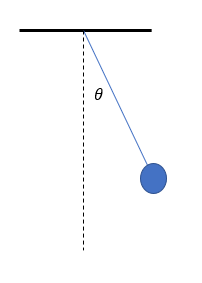


Produce a VPython animation of the pendulum bob of length 10 m using a VPython *sphere()* object. Have your animation show 10 oscillations of the cycle at a reasonable rate.  You do not need to draw the massless rod (but you can use the Vpyton *rod()* object if you like).

I find a *canvas* size of width=height=400 works well. Start your pendulum at an initial angle of $45^{\circ}$. 

*Hint*: The angular velocity $\omega$ of the pendulum is $\sqrt{\frac{g}{l}}$.



In [ ]:
# CP3 code here

**/10 pts**

**CP4 Multiple integral (10 pt)**

Numerically integrate 

$$
\int\int \exp^{-xy}dxdy
$$

on the domain defined by $0\le x \le 2$ and $0\le y \le 1$. Use your own preferred method of integration. Calculate and print the value of the integral along with its approximation error. 



In [ ]:
# CP4 code here

**CP5 Improper integral (10 pts)**

Using a change of variables transform the integral:

$$
I = \int^{\infty}_0 \frac{x dx}{(1+x)^4}
$$

into one over a finite domain. 



*Type your transformed integral here, or write on a sheet of paper and turn in when finished.*


Evaluate the integral using whichever method you like, and estimate approximation error.

In [ ]:
# CP5 code here

**/10 pts**

**CP6 Reading in data: Motion of a particle (20 pts total - you can do any or all of the parts)**

The file *velocities.txt* contains two columns of numbers, the first representing time *t* in *seconds*, and the second the *x*-velocity in meters per second of a particle, measured once every second from time $t=0$ to $t=100 s.$ The first few lines look like this:

```
0	0
1	0.069478
2	0.137694
3	0.204332
4	0.269083
```

a) Read in the data from and plot the velocity of the particle as a function of time $t$. Label the axes. (**5 pts**)

*Note: You will need to download the velocities.txt file from Canvas in the Exams module. If you place it in same folder as exam notebook, you don't need to specify the directory path.*

In [ ]:
#CP6 part a

**/5pts**

b) Calculate the acceleration of the particle as a function of time, by numerically calculating the derivative $\frac{dv}{dt}$ using a time interval of 1 second. Plot the acceleration of the particle vs. time. Label axes. Given the velocity curve, does your acceleration curve make sense? Why or why not? (**5 pts**)

In [ ]:
#CP6 part b

**/5pts**

c) Calculate the distance travelled by the particle as a function of time by numerically integrating the velocities using the trapezoidal rule. Assume the initial position is 0, and plot the distance vs. time. Given the velocity curve, does your distance curve make sense? Why or why not? (**10 pts**) 

In [ ]:
#CP6 part c

**/10 pts**

**CP7 Comparison of trapezoidal and Simpson's Rule (15 pts)**

Write a program that determines the number of slices required by both the trapezoidal and Simpson's rule to estimate the following integral to numerical precision of $10^{-6}$. You can use any method you wish to estimate the approximation error. I recommend doubling $N$ with each iteration to reduce computation time. While you can certainly use the adaptive trapezoidal rule, it is not necessary.


$$
I = \int^{2}_{-2} (x^5 -5x^2 -1) dx
$$


In [ ]:
# CP7


**/15 pts**

### Total /50 pts